# Building Histograms

### How to run this code:
* Give date and type of vehicle as arguments
* If simplified etapas file does not exist, then run RunDailyEtapasBuilder.runSimplifyEtapas(). If it already exists, then omit it

Run the builder in this order:
1. etapas_df = RunDailyEtapasBuilder.loadSimplifiedEtapas()
2. merged_df = RunDailyEtapasBuilder.includeTorniquetesDate(etapas_df)
3. clean_df = RunDailyEtapasBuilder.cleanDataFrame(merged_df)
4. sorted_df = RunDailyEtapasBuilder.sortDataFrame(clean_df)

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from importlib import reload

In [3]:
import RunDailyEtapasBuilder

Enter the date to analyze: 2017-03-01
Enter the vehicle to analyze: BUS


* Running the builder of the dataframe

In [4]:
etapas_df=RunDailyEtapasBuilder.loadSimplifiedEtapas()
merged_df = RunDailyEtapasBuilder.includeTorniquetesDate(etapas_df)
clean_df = RunDailyEtapasBuilder.cleanDataFrame(merged_df)
sorted_df = RunDailyEtapasBuilder.sortDataFrame(clean_df)

0


* Adding necessary attributes

In [7]:
sorted_df['t_subida'] = pd.to_datetime(sorted_df.t_subida)
sorted_df['fecha_instalacion'] = pd.to_datetime(sorted_df.fecha_instalacion)

sorted_df['diferencia_tiempo'] = (sorted_df['t_subida']-sorted_df['t_subida'].shift()).fillna(0)
sorted_df['diferencia_tiempo_secs'] = sorted_df['diferencia_tiempo'].dt.total_seconds()
sorted_df['mismo_paradero'] = (sorted_df['par_subida']==sorted_df['par_subida'].shift()).fillna(0)

sorted_df['si_torniquete'] = (sorted_df['fecha_instalacion']<=sorted_df['t_subida']).fillna(0)

* Filtering by mismo_paradero and by si_torniquete

In [9]:
filtered_df = sorted_df[sorted_df['mismo_paradero']==True]
filtered_torniquete_df = filtered_df[filtered_df['si_torniquete']==True]
filtered_no_torniquete_df = filtered_df[filtered_df['si_torniquete']==False]

* Looking the data

In [10]:
filtered_df.head()

,id,nviaje,tipo_transporte,t_subida,servicio_subida,par_subida,sitio_subida,fecha_instalacion,diferencia_tiempo,diferencia_tiempo_secs,mismo_paradero,si_torniquete
676881,4010786011,1,BUS,2017-03-01 04:22:35,F28 C2 00I,L-34-89-2-PO,BBJZ-76,2016-11-01,00:00:06,6.0,True,True
676882,4011556219,1,BUS,2017-03-01 05:40:11,F08 00R,L-34-41-100-OP,BBJZ-76,2016-11-01,00:00:06,6.0,True,True
676832,2802344526,1,BUS,2017-03-01 05:40:15,F08 00R,L-34-41-100-OP,BBJZ-76,2016-11-01,00:00:04,4.0,True,True
676868,3609949028,1,BUS,2017-03-01 05:40:41,F08 00R,L-34-41-100-OP,BBJZ-76,2016-11-01,00:00:26,26.0,True,True
676886,4209437819,1,BUS,2017-03-01 05:43:06,F08 00R,L-34-41-45-OP,BBJZ-76,2016-11-01,00:00:05,5.0,True,True


In [11]:
filtered_torniquete_df.head()

,id,nviaje,tipo_transporte,t_subida,servicio_subida,par_subida,sitio_subida,fecha_instalacion,diferencia_tiempo,diferencia_tiempo_secs,mismo_paradero,si_torniquete
676881,4010786011,1,BUS,2017-03-01 04:22:35,F28 C2 00I,L-34-89-2-PO,BBJZ-76,2016-11-01,00:00:06,6.0,True,True
676882,4011556219,1,BUS,2017-03-01 05:40:11,F08 00R,L-34-41-100-OP,BBJZ-76,2016-11-01,00:00:06,6.0,True,True
676832,2802344526,1,BUS,2017-03-01 05:40:15,F08 00R,L-34-41-100-OP,BBJZ-76,2016-11-01,00:00:04,4.0,True,True
676868,3609949028,1,BUS,2017-03-01 05:40:41,F08 00R,L-34-41-100-OP,BBJZ-76,2016-11-01,00:00:26,26.0,True,True
676886,4209437819,1,BUS,2017-03-01 05:43:06,F08 00R,L-34-41-45-OP,BBJZ-76,2016-11-01,00:00:05,5.0,True,True


In [12]:
filtered_no_torniquete_df.head()

,id,nviaje,tipo_transporte,t_subida,servicio_subida,par_subida,sitio_subida,fecha_instalacion,diferencia_tiempo,diferencia_tiempo_secs,mismo_paradero,si_torniquete
333798,80190406,1,BUS,2017-03-01 06:12:47,T502 C0 00I,L-11-5-5-PO,BDXR-14,2017-04-28,00:00:03,3.0,True,False
334241,3856974411,1,BUS,2017-03-01 06:13:25,T502 C0 00I,T-11-85-PO-3,BDXR-14,2017-04-28,00:00:02,2.0,True,False
334193,3561804766,1,BUS,2017-03-01 06:13:27,T502 C0 00I,T-11-85-PO-3,BDXR-14,2017-04-28,00:00:02,2.0,True,False
334267,3965850650,1,BUS,2017-03-01 06:16:04,T502 C0 00I,L-11-18-15-PO,BDXR-14,2017-04-28,00:00:02,2.0,True,False
334053,2527036206,1,BUS,2017-03-01 06:16:37,T502 C0 00I,L-11-18-25-PO,BDXR-14,2017-04-28,00:00:00,0.0,True,False


* Plotting

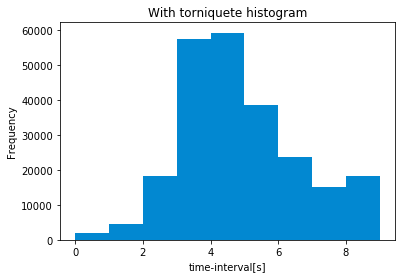

In [15]:
colors = [(2, 136, 209),(0, 151, 167),(0, 121, 107)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

original_hist, ax = plt.subplots()
original_hist_data = ax.hist(filtered_torniquete_df['diferencia_tiempo_secs'].values,bins=range(0,1*10,1),color=colors[0])
ax.set_title('With torniquete histogram')
ax.set_xlabel('time-interval[s]')
ax.set_ylabel('Frequency')


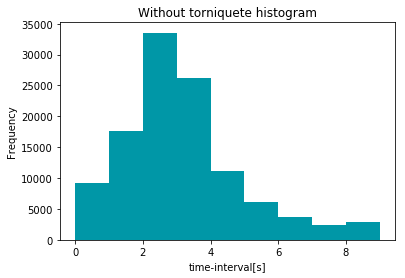

In [16]:
filtered_hist, ax = plt.subplots()
filtered_hist_data = ax.hist(filtered_no_torniquete_df['diferencia_tiempo_secs'].values,bins=range(0,1*10,1),color=colors[1])
ax.set_title('Without torniquete histogram')
ax.set_xlabel('time-interval[s]')
ax.set_ylabel('Frequency')